In [1]:
# b站教材
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split


In [2]:
# 导入数据集
# index_col 将第0列作为索引
data = pd.read_csv('data/train.csv',index_col=0)
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 11)

In [4]:
# .info() 可以查看数据缺失值 以及 数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# 删除 不需要 以及 缺失值过多的列
# axis = 1 对列进行操作
# inplace 直接对 data 进行操作
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

In [6]:
data.shape

(891, 8)

In [7]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [8]:
data.describe(include=['O'])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [9]:
# astype 能将pandas 对象转换成某种类型 
data["Sex"] = (data["Sex"] == "male").astype("int")

In [10]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,S
888,1,1,0,19.0,0,0,30.0000,S
889,0,3,0,NaN,1,2,23.4500,S


In [11]:
# 缺失值 处理
# value_counts 值计数 会给出 对应的值 以及 值的个数
data["Embarked"].value_counts().sum()

889

In [12]:
# 将三分值变量转换成 数值型变量
data["Embarked"].isnull().sum() # 查看缺失值

2

In [13]:
# 删除 缺失值
data = data[data["Embarked"].notnull()]

In [14]:
data.shape

(889, 8)

In [15]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [16]:
labels = data["Embarked"].unique().tolist()

In [17]:
labels

['S', 'C', 'Q']

In [18]:
# 通过 labels 中的索引 来 对 embarked 中的数据 进行 重新 编码
labels.index("C")
data["Embarked"] = data["Embarked"].apply(lambda x:labels.index(x))

C:\Users\86180\AppData\Local\Temp\ipykernel_12448\2343410996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Embarked"] = data["Embarked"].apply(lambda x:labels.index(x))


In [19]:
# 提取标签 和特征矩阵 切分 测试集和训练集
# iloc 为 通过行列索引 去取表格数据的函数
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

In [20]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3, random_state=420)

In [21]:
Xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
699,1,1,49.0,1,1,110.8833,1
67,2,0,29.0,0,0,10.5000,0
771,3,1,24.0,0,0,9.5000,0
159,3,1,NaN,0,0,8.6625,0
139,3,1,16.0,0,0,9.2167,0
...,...,...,...,...,...,...,...
629,3,1,26.0,0,0,7.8958,0
801,2,1,34.0,0,0,13.0000,0
577,2,0,34.0,0,0,13.0000,0


In [22]:
# 因为打乱了 所以需要修正索引列
# 修正训练集 测试集 索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [23]:
Xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,49.0,1,1,110.8833,1
1,2,0,29.0,0,0,10.5000,0
2,3,1,24.0,0,0,9.5000,0
3,3,1,NaN,0,0,8.6625,0
4,3,1,16.0,0,0,9.2167,0
...,...,...,...,...,...,...,...
617,3,1,26.0,0,0,7.8958,0
618,2,1,34.0,0,0,13.0000,0
619,2,0,34.0,0,0,13.0000,0
620,3,1,21.0,0,0,7.7958,0


In [24]:
# 缺失值 检查
Xtest.isnull().sum()

Pclass       0
Sex          0
Age         57
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [25]:
# 处理缺失值 对 缺失值列进行补充
# loc函数是利用index的名字，来获取想要的行或列
Xtrain.loc[:,"Age"] = Xtrain["Age"].fillna(Xtrain["Age"].mean())
Xtest.loc[:,"Age"] = Xtest["Age"].fillna(Xtrain["Age"].mean())

In [26]:
# 检查一下
Xtest.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
Xtrain.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 建模 并 进行模型优化

In [28]:
clf = DTC(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score_ = clf.score(Xtest,Ytest)
score_

0.7453183520599251

0.8052434456928839


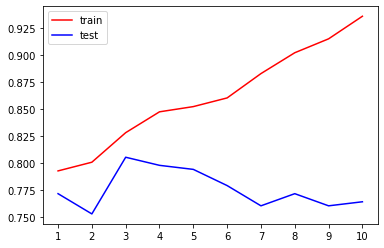

In [32]:
# 通过剪枝参数 对模型 进行调整
# 调整最大树深 来 看看模型准确率
tr = []
te = []
for i in range(1,11):
    clf = DTC(random_state=0,max_depth=i)
    clf = clf.fit(Xtrain,Ytrain)
    # 训练集 测试集
    # 随着 树深的增加 模型 会越来越过拟合
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = clf.score(Xtest,Ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11), tr, color="red", label="train")
plt.plot(range(1,11), te, color="blue", label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

    

0.8014981273408239


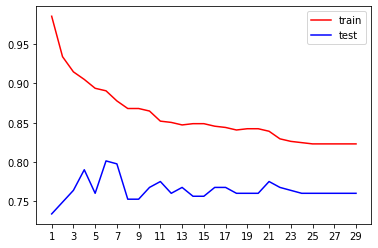

In [35]:
# 在不同 min_samples_leaf 下观察模型拟合状况
# min_samples_leaf 可以缓解过拟合情况
tr = []
te = []
for i in range(1,30):
    clf = DTC(random_state=0
#              ,max_depth=3
              ,min_samples_leaf=i)
    clf = clf.fit(Xtrain,Ytrain)
    # 训练集 测试集
    # 随着 树深的增加 模型 会越来越过拟合
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = clf.score(Xtest,Ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,30), tr, color="red", label="train")
plt.plot(range(1,30), te, color="blue", label="test")
plt.xticks(range(1,30)[::2])
plt.legend()
plt.show()


0.8089887640449438


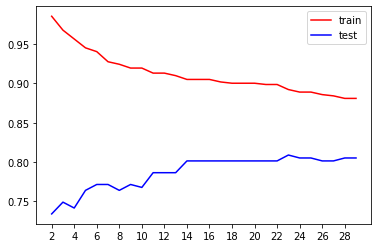

In [37]:
# min_samples_split 下观察模型 拟合状况
# 参数增大 过拟合情况 越小
tr = []
te = []
for i in range(2,30):
    clf = DTC(random_state=0
#              ,max_depth=3
              ,min_samples_split=i)
    clf = clf.fit(Xtrain,Ytrain)
    # 训练集 测试集
    # 随着 树深的增加 模型 会越来越过拟合
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = clf.score(Xtest,Ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(2,30), tr, color="red", label="train")
plt.plot(range(2,30), te, color="blue", label="test")
plt.xticks(range(2,30)[::2])
plt.legend()
plt.show()

0.7752808988764045


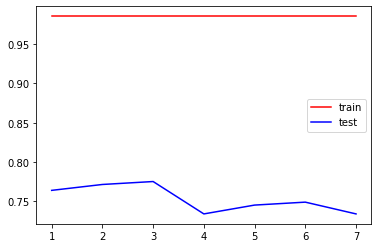

In [38]:
# max_features 下观察
# 过拟合情况 严重

tr = []
te = []
for i in range(1,8):
    clf = DTC(random_state=0
#              ,max_depth=3
              ,max_features=i)
    clf = clf.fit(Xtrain,Ytrain)
    # 训练集 测试集
    # 随着 树深的增加 模型 会越来越过拟合
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = clf.score(Xtest,Ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,8), tr, color="red", label="train")
plt.plot(range(1,8), te, color="blue", label="test")
plt.xticks(range(1,8))
plt.legend()
plt.show()

0.7790262172284644


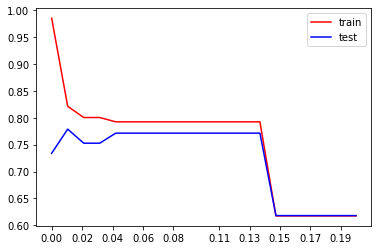

In [43]:
# 在 min_impurity_decrease 下 观察模型的拟合情况
tr = []
te = []
for i in np.linspace(0,0.2,20):
    clf = DTC(random_state=0
#              ,max_depth=3
              ,min_impurity_decrease=i)
    clf = clf.fit(Xtrain,Ytrain)
    # 训练集 测试集
    # 随着 树深的增加 模型 会越来越过拟合
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = clf.score(Xtest,Ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(np.linspace(0,0.2,20), tr, color="red", label="train")
plt.plot(np.linspace(0,0.2,20), te, color="blue", label="test")
plt.xticks(np.round(np.linspace(0,0.2,20),2)[::2])
plt.legend()
plt.show()
